## HW2: Linear Discriminant Analysis
In hw2, you need to implement Fisher’s linear discriminant by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by calling sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

## Load data

In [1]:
%config IPCompleter.use_jedi=False
import numpy as np

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
m1 = np.mean(x_train[y_train==0], axis=0)
m2 = np.mean(x_train[y_train==1], axis=0)

In [5]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 1.3559426  -1.34746216] mean vector of class 2: [-1.29735587  1.29096203]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
sw = np.mean([np.outer(x,x) for x in (x_train[y_train==0]-m1)], axis=0)\
    +np.mean([np.outer(x,x) for x in (x_train[y_train==1]-m2)], axis=0)

In [7]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 1.03398852 -0.60700984]
 [-0.60700984  1.76839248]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
sb = np.outer((m1-m2), (m1-m2))

In [9]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 7.03999279 -7.00052687]
 [-7.00052687  6.9612822 ]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
w = np.array(np.linalg.inv(sw).dot(m1-m2))
#w = w/(w@w)
norm_w = w@w
w = np.array([w]).T

In [11]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[ 2.11674398]
 [-0.76540687]]


In [12]:
my_1 = w.T@m1
my_2 = w.T@m2
x_proj = (w.T@x_test.T).reshape(-1)
x_proj = [_x/norm_w for _x in x_proj]
y_pred = np.array([0 if ((x-my_1)**2 < (x-my_2)**2) else 1 for x in x_proj])

## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score 
you can use accuracy_score function from sklearn.metric.accuracy_score

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
acc = accuracy_score(y_test, y_pred)

In [15]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.968


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [16]:
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

In [17]:
lines = np.array([np.array([x, ((w.T@x)*w.T)[0]]).T for x in x_test])

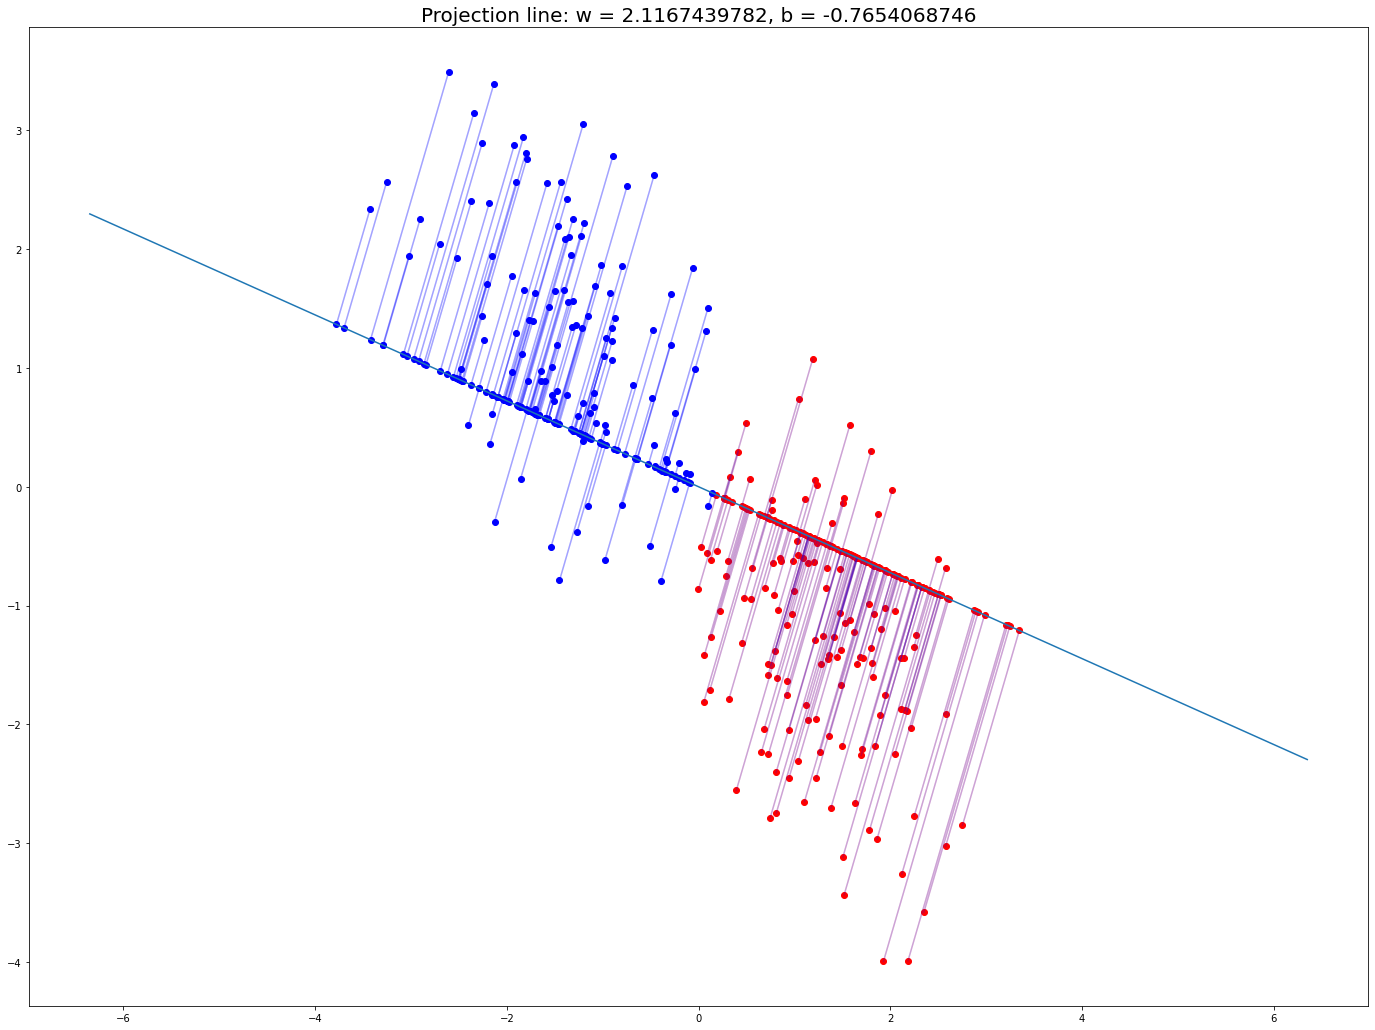

In [18]:
plt.figure(figsize=(24,18))
x_proj_2d = np.array([w.T[0]*_x for _x in x_proj])

plt.scatter(x_test[y_pred==0].T[0], x_test[y_pred==0].T[1], c='red')
plt.scatter(x_proj_2d[y_pred==0].T[0], x_proj_2d[y_pred==0].T[1], c='red')

for i in range(len(x_test[y_pred==0])):
    plt.plot([x_test[y_pred==0].T[0][i], x_proj_2d[y_pred==0].T[0][i]], \
             [x_test[y_pred==0].T[1][i], x_proj_2d[y_pred==0].T[1][i]], 'r', alpha=0.2)

plt.scatter(x_test[y_pred==1].T[0], x_test[y_pred==1].T[1], c='blue')
plt.scatter(x_proj_2d[y_pred==1].T[0], x_proj_2d[y_pred==1].T[1], c='blue')

for i in range(len(x_test[y_pred==1])):
    plt.plot([x_test[y_pred==1].T[0][i], x_proj_2d[y_pred==1].T[0][i]], \
             [x_test[y_pred==1].T[1][i], x_proj_2d[y_pred==1].T[1][i]], 'b', alpha=0.2)

line_w = np.array([x*w.T[0] for x in np.linspace(-3,3, num=100)]).T

for i in range(len(x_test)):
    plt.plot([x_test.T[0][i], x_proj_2d.T[0][i]], [x_test.T[1][i], x_proj_2d.T[1][i]], 'b', alpha=0.2)
    
plt.plot(line_w[0], line_w[1])
plt.title('Projection line: w = {:.10f}, b = {:.10f}'.format(w.T[0][0], w.T[0][1]), fontsize=20)
plt.show()